# 🧩 Merge Turnstile Data with Simplified Station Mapping

This notebook merges your cleaned MTA turnstile data with a simplified station metadata file containing `control_area`, `unit`, and `station` columns.

## Load the Data

In [1]:
import pandas as pd

# Load cleaned turnstile data
df = pd.read_csv('../data/processed/cleaned_Turnstile2022.csv')

# Load simplified station mapping
mapping = pd.read_csv('../data/external/Remote-Booth-Station.csv')

/var/folders/rk/gh7_0ltx2v71ltw25mck4xrm0000gn/T/ipykernel_30554/2977380767.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/cleaned_Turnstile2022.csv')


## Rename Columns and Clean Up Whitespace

In [2]:
mapping = mapping.rename(columns={
    'control_area': 'C/A',
    'unit': 'UNIT',
    'station': 'STATION'
})

# Strip whitespace from key columns
for col in ['C/A', 'UNIT', 'SCP']:
    df[col] = df[col].astype(str).str.strip()
for col in ['C/A', 'UNIT']:
    mapping[col] = mapping[col].astype(str).str.strip()

## Merge Turnstile Data with Station Names

In [4]:
df_merged = pd.merge(df, mapping, on=['C/A', 'UNIT'], how='left')
df_merged[['C/A', 'UNIT', 'STATION']].drop_duplicates().head()

,C/A,UNIT,STATION
0,A002,R051,LEXINGTON AVE
26211,A006,R079,5 AV
43774,A007,R079,5 AV
56890,A010,R080,57 ST-7 AV
74385,A011,R080,57 ST-7 AV


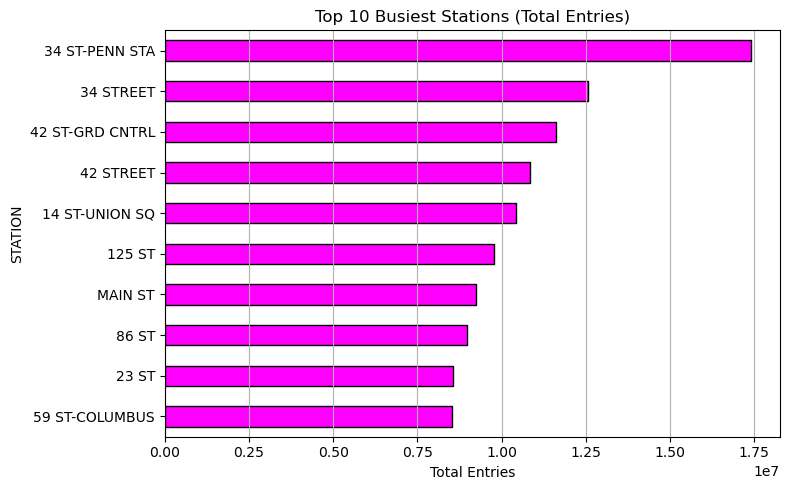

In [6]:
top_stations = df_merged.groupby('STATION')['HOURLY_ENTRIES'].sum().sort_values(ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
top_stations.plot(kind='barh', color='magenta', edgecolor='black')
plt.title("Top 10 Busiest Stations (Total Entries)")
plt.xlabel("Total Entries")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()
